# Problem Statement 

The problem statement is to detect intrusions from a tcp dump.The data is provided in csv files so no feature extraction is involved 

In [7]:
from data import fetch_data,feature_engineering
from models.model import Model
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import os
from sklearn.metrics import f1_score,confusion_matrix,roc_curve
from sklearn.externals import joblib
from Para_learn import paralearn
import pickle
import requests
from cross_val import k_fold_crossval
%matplotlib inline 
root=os.getcwd()

In [8]:
x_train,y_train,x_test,y_test = fetch_data(root,remove_duplicates=True,binary=True)

Datasets loaded :)
The dimensions of the training dataset is (145583, 41)
The dimensions of test dataset is (311028, 41)
The taken to load data is 3.45 secs


In [9]:
x_train = feature_engineering(x_train,do_normalization=False)
x_test = feature_engineering(x_test,do_normalization=False)
print('Shape of training data after feature engineering is {}'.format(x_train.shape))
print ('Shape of test data after feature engineering is {}'.format(x_test.shape))

Shape of training data after feature engineering is (145583, 45)
Shape of test data after feature engineering is (311028, 45)


In [10]:
y_train.value_counts()

0    87814
1    57769
Name: label, dtype: int64

# Sampling 

# Modelling in progress

In [11]:

clf=Model(x_train,y_train)


In [12]:
#NAIVE BAYES
nb=clf.mnbayes(x_train,y_train)
predict_train_nb=nb.predict(x_train)
conf_matrix_nb=confusion_matrix(list(y_train),(predict_train_nb).round())
f1_score_train_nb=f1_score(list(y_train),(predict_train_nb).round())
fpr_nb,tpr_nb,thr_nb = roc_curve(list(y_train),(predict_train_nb))
auc_nb=np.trapz(tpr_nb,fpr_nb)
print (conf_matrix_nb)
print('The f1 score for NAIVE BAYES model on training data is {:.4f}'.format(f1_score_train_nb))  


[[77644 10170]
 [18535 39234]]
The f1 score for NAIVE BAYES model on training data is 0.7321620184188181


In [13]:
cross_val_score_nb=k_fold_crossval(nb,x_train,y_train,6)

f1 score for 1 iteration................. 0.6482
f1 score for 2 iteration................. 0.6264
f1 score for 3 iteration................. 0.6415
f1 score for 4 iteration................. 0.8750
f1 score for 5 iteration................. 0.6663
f1 score for 6 iteration................. 0.6389


In [14]:
#SVM 
svm=clf.svm(x_train,y_train)
predict_train_svm=svm.predict(x_train)
conf_matrix_svm=confusion_matrix(list(y_train),(predict_train_svm).round())
f1_score_train_svm=f1_score(list(y_train),(predict_train_svm).round())
fpr_svm,tpr_svm,thr_svm = roc_curve(list(y_train),(predict_train_svm))
auc_svm=np.trapz(tpr_svm,fpr_svm)


print (conf_matrix_svm)
print('The f1 score for SUPPORT VECTOR MACHINES model on training data is {:.4f}'.format(f1_score_train_svm))


[[82620  5194]
 [ 2067 55702]]
The f1 score for SUPPORT VECTOR MACHINES model on training data is 0.9388


In [ ]:
cross_val_score_svm=k_fold_crossval(svm,x_train,y_train,6)

In [5]:
#XGBOOST 
xgb,x_dtrain,x_dtest=clf.xgboost(x_train,y_train,x_test,cv=True)
predict_train_xgb=xgb.predict(x_dtrain)
conf_matrix_xgb=confusion_matrix(list(y_train),(predict_train_xgb).round())
f1_score_train_xgb=f1_score(list(y_train),(predict_train_xgb).round())
fpr_xgb,tpr_xgb,thr_xgb = roc_curve(list(y_train),(predict_train_xgb))
auc_xgb=np.trapz(tpr_xgb,fpr_xgb)


print (conf_matrix_xgb)
print('The f1 score for XGBOOST model on training data is {:.4f}'.format(f1_score_train_xgb))


[0]	train-auc:0.994297+0.000266011	test-auc:0.994209+0.000426128
[1]	train-auc:0.999001+0.000106937	test-auc:0.998963+0.000269452
[2]	train-auc:0.999621+5.48576e-05	test-auc:0.999574+5.94421e-05
[3]	train-auc:0.999758+2.82744e-05	test-auc:0.99973+7.18955e-05
[4]	train-auc:0.999775+1.98937e-05	test-auc:0.999757+7.90048e-05
[5]	train-auc:0.999803+1.37055e-05	test-auc:0.999784+8.77897e-05
[6]	train-auc:0.999868+2.53014e-05	test-auc:0.999841+6.03503e-05
[7]	train-auc:0.99991+2.56094e-05	test-auc:0.999853+5.47262e-05
[8]	train-auc:0.999931+2.18486e-05	test-auc:0.999843+6.18547e-05
[9]	train-auc:0.999963+5.95315e-06	test-auc:0.999877+4.56526e-05
[[87783    31]
 [   71 57698]]
The f1 score for XGBOOST model on training data is 0.9991


In [ ]:
#RANDOMFOREST 
rf=clf.randforest(x_train,y_train)
predict_train_rf=rf.predict(x_train)
conf_matrix_rf=confusion_matrix(list(y_train),(predict_train_rf).round())
f1_score_train_rf=f1_score(list(y_train),(predict_train_rf).round())
fpr_rf,tpr_rf,thr_rf = roc_curve(list(y_train),(predict_train_rf))
auc_rf=np.trapz(tpr_rf,fpr_rf)
print (conf_matrix_rf)
print('The f1 score for RANDOM FOREST model on training data is {:.4f}'.format(f1_score_train_rf))


In [ ]:
# Cross validation to check whether the model is overfitting or not 
cross_val_score_rf=k_fold_crossval(rf,x_train,y_train,6)


# Model Selection 


After doing hyperparameter optimization for different models on the training data and computing a metric evaluating the generalization of a particular model,we can select which model will be our best bet for generalizing over to the unseen data 

NameError: name 'fpr_nb' is not defined

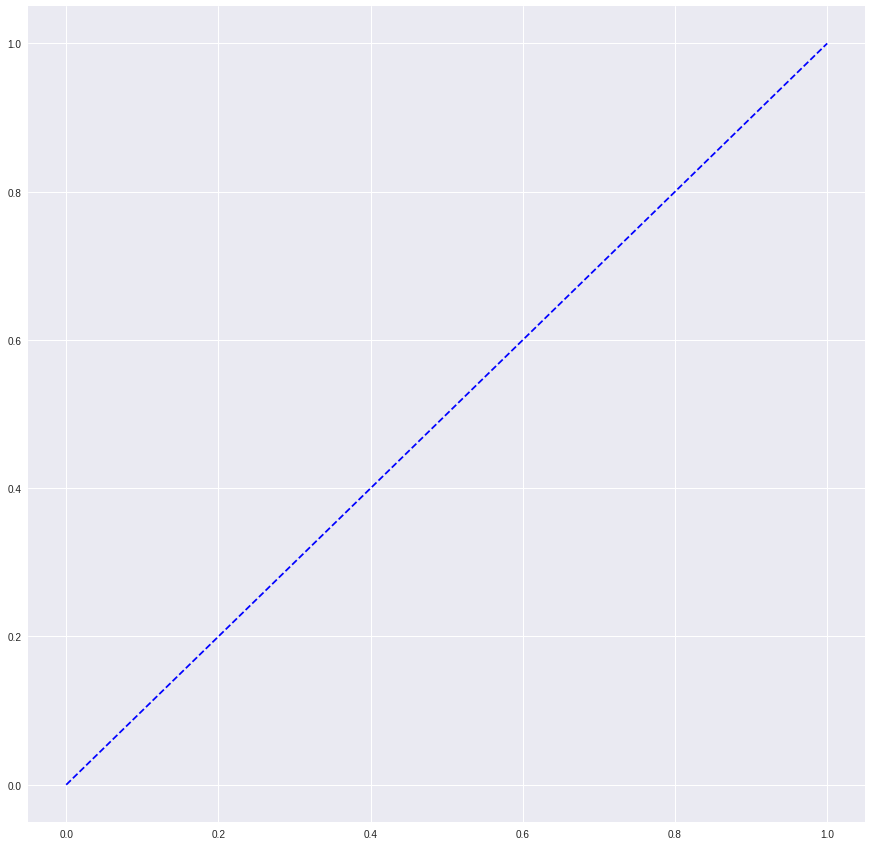

In [6]:
# ROC - AUC  Plots 
plt.figure(figsize=(15,15))
plt.plot([0,1],[0,1],'b--')
plt.plot(fpr_nb,tpr_nb,'r',label='Naive bayes (AUC={:.2f})'.format(auc_nb))
plt.plot(fpr_svm,tpr_svm,'g',label = 'SVM (AUC={:.2f})'.format(auc_svm))
plt.plot(fpr_xgb,tpr_xgb,'y',label='XGboost (AUC={:.2f})'.format(auc_xgb))
plt.plot(fpr_rf,tpr_rf,'k',label='Randomforest (AUC={:.2f})'.format(auc_rf))
plt.xlabel('False positive rates ',size=20)
plt.ylabel('True positive rates',size=20)
plt.legend(loc='lower right',prop={'size':19})
plt.show()

# Multiclass Classification 


# Hitting the API 

In [ ]:
#Random forest is the one. Lets save this model somewhere and hit the api to see what happens 
joblib.dump(rf,'random_forest.pkl')

In [ ]:
# Hitting the api 
root

In [ ]:
import pickle

In [ ]:
pickle.load(open('rf_test.pkl','rb'))

In [ ]:
pickle.dump(rf,open('rf_test.pkl','wb'),protocol=2)